In [9]:
cd /yolov7

/yolov7


In [5]:
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('./yolov7-tiny.pt')
model = weigths['model']
model = model.half().to(device)
_ = model.eval()

In [46]:
image = cv2.imread('/data/1_AussenbahnTag_yolo/images/1_image_000031.jpg')  # 504x378 image
image = letterbox(image, 1280, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))
image = image.to(device)
image = image.half()

output = model(image)

In [47]:
obj1 = output[1][0][0, 0, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj2 = output[1][0][0, 1, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj3 = output[1][0][0, 2, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj4 = output[1][1][0, 0, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj5 = output[1][1][0, 1, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj6 = output[1][1][0, 2, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj7 = output[1][2][0, 0, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj8 = output[1][2][0, 1, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)
obj9 = output[1][2][0, 2, :, :, 4].sigmoid().cpu().detach().numpy().astype(np.float32)

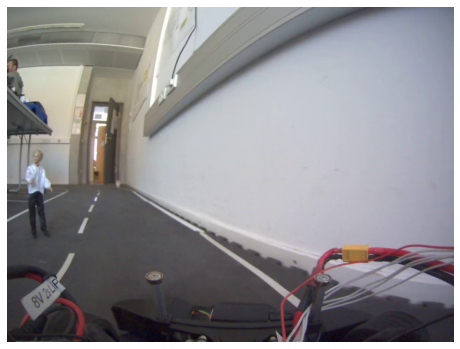

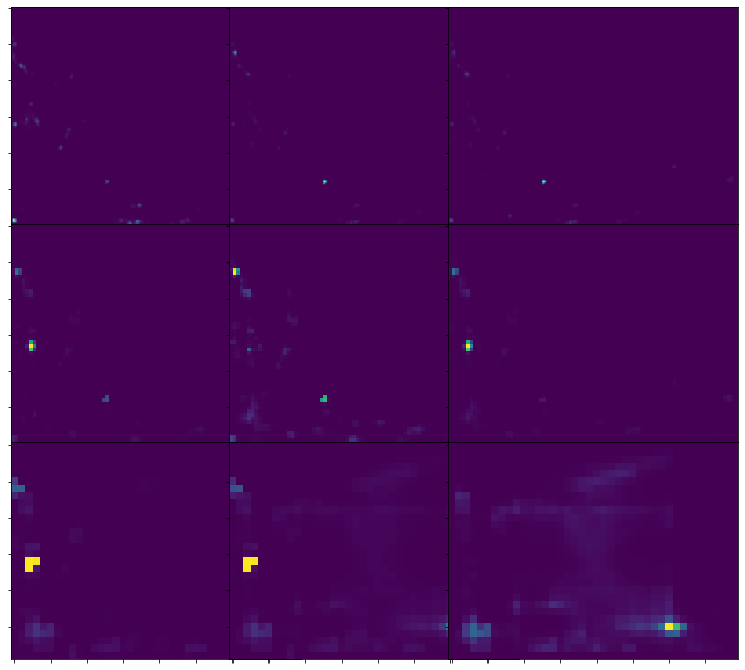

In [48]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(image_[:,:,[2,1,0]])
plt.show()
fig, ax = plt.subplots(3,3,figsize=(16,12))
#[ax_.axis('off') for ax_ in ax.ravel()]
[ax_.set_xticklabels([]) for ax_ in ax.ravel()]
[ax_.set_yticklabels([]) for ax_ in ax.ravel()]
ax.ravel()[0].imshow(obj1)
ax.ravel()[1].imshow(obj2)
ax.ravel()[2].imshow(obj3)
ax.ravel()[3].imshow(obj4)
ax.ravel()[4].imshow(obj5)
ax.ravel()[5].imshow(obj6)
ax.ravel()[6].imshow(obj7)
ax.ravel()[7].imshow(obj8)
ax.ravel()[8].imshow(obj9)
plt.subplots_adjust(wspace=-0.52, hspace=0)
plt.show()